Heart Disease | Kelompok 5:
1. Reinhard (00000045346)
2. Katherine Allen Lius (00000044462)
3. Theresia Cindana (00000044538)
4. Tralya Dharmada (00000044343)
5. Valencia Eurelia A.T (00000046227)

In [1]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
sns.set(style="darkgrid")

In [3]:
# read data
heart_disease = pd.read_csv("heart_cleveland_upload.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## CRISP-DM: 2) Data Understanding

1. Age: Age in years
2. Sex: Male (1) or Female(0)
3. CP: pain has values between
   - Value 0: typical angina
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: asymptomatic 0-3.
4. Resting Blood Pressure(trestbps): resting blood pressure (in mmHg on admission to the hospital)
5. Cholestorol: serum cholestoral in mg/dl
6. fbs(Fast blood sugar) : blood sugar while fasting (>120 mg/dl)
    - True = 1,
    - False = 0
7. Restecg : resting ecg graph
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: max heart rate
9. exang : Exercise induced angina is chest pain while exercising or doing any physical activity
    - Yes = 1,
    - No = 0
10. Old peak : ST Depression is the difference between value of ECG at rest and after exercise.
11. Slope : target to the depression value. The number of major blood vessels supplying blood to heart blocked.
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. Thal : The Types of thalassemia
    - Normal = 0,
    - Fixed defect = 1,
    - Reversable defect = 3
13. Condition : Here 1 denotes heart attack and 0 denotes didn't occur

In [4]:
# dummy dataset (digunakan untuk EDA)
heart_dis = pd.read_csv("heart_cleveland_upload.csv")
dummmy_df = heart_dis # ubah nama

In [5]:
# mengubah data
dummmy_df['condition'] = dummmy_df['condition'].map({0: 'Normal', 1: 'Heart Attack'})
dummmy_df['sex']=dummmy_df['sex'].map({0:'Female',1:'Male'})
dummmy_df['cp']=dummmy_df['cp'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
dummmy_df['restecg']=dummmy_df['restecg'].map({0:'Normal',1:'ST-T abnormal',2:'Left ventricular'})
dummmy_df['exang']=dummmy_df['exang'].map({0:'no',1:'yes'})
dummmy_df['thal']=dummmy_df['thal'].map({0:'Normal',1:'Fixed defect',2:'reversable defect'})

In [6]:
# menampilkan data
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## CRISP-DM: 3) Data Preparation

In [7]:
# mencari missing value
heart_disease.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
# mencari duplikasi data
heart_disease.duplicated().sum()

0

In [9]:
# melihat data dengan perhitungan statistik
heart_disease.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


### Data Exploration

In [10]:
plt.rcParams['figure.figsize'] = (10, 9)

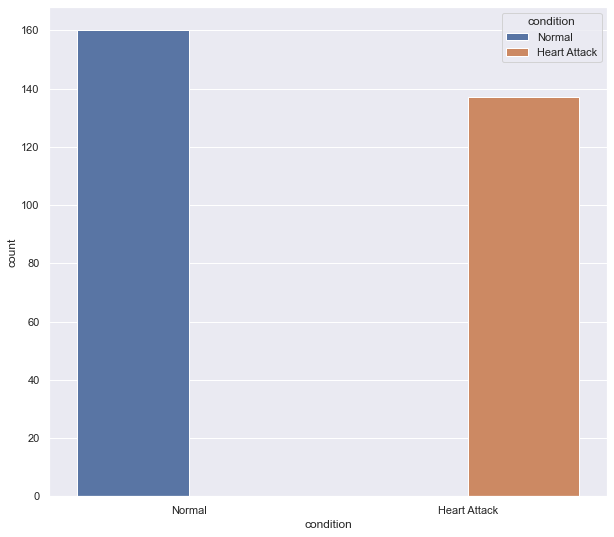

In [11]:
#1 Visualisasi variabel Condition
sns.countplot(x="condition", data=heart_dis,hue="condition")
plt.show()

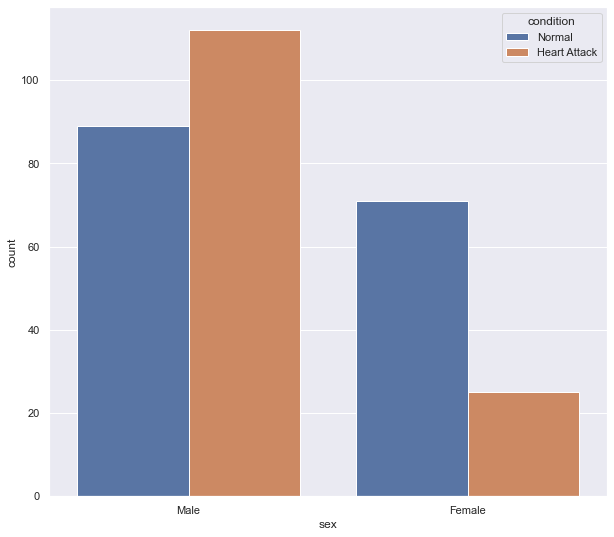

In [12]:
#2 Visualisasi variabel Sex
sns.countplot(x="sex", data=heart_dis,hue="condition")
plt.show()

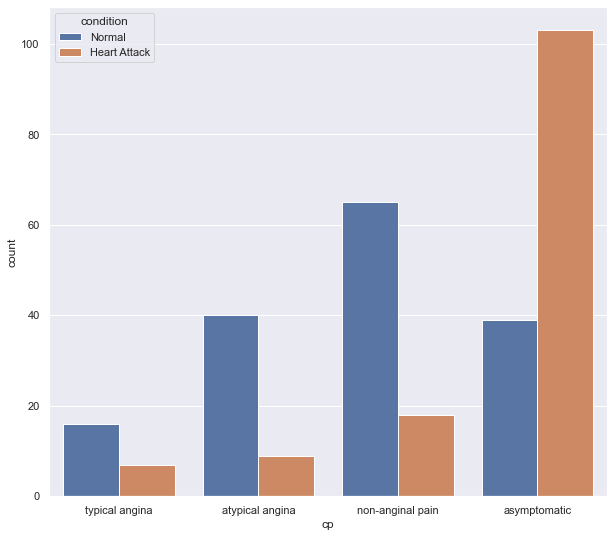

In [13]:
#3 Visualisasi variabel CP
sns.countplot(x="cp", data=heart_dis,hue="condition")
plt.show()

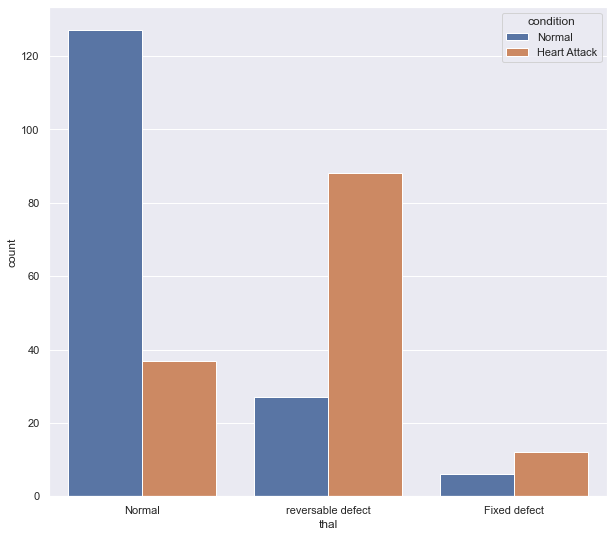

In [14]:
#4 Visualisasi variabel Thal
sns.countplot(x="thal", data=heart_dis,hue="condition")
plt.show()

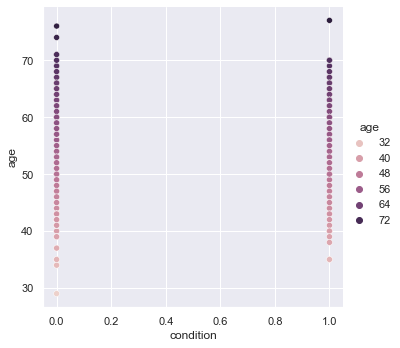

In [15]:
#5 Visualisasi variabel Condition dan Age
sns.relplot(x='condition',y='age',data=heart_disease,hue='age')

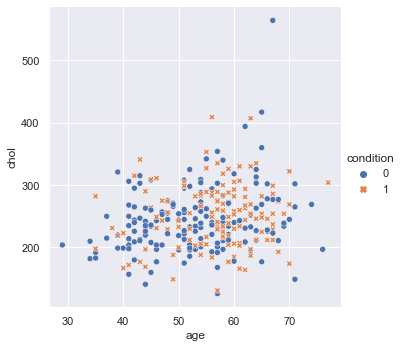

In [16]:
#6 Visualisasi variabel Age dan Chol
sns.relplot(x="age", y="chol", data=heart_disease,hue='condition',style="condition")

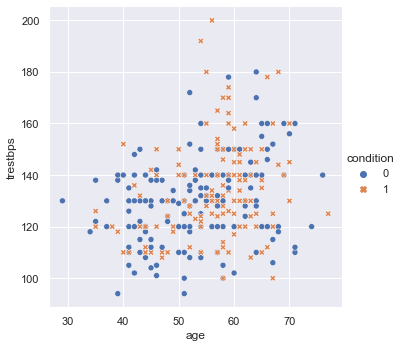

In [17]:
#7 Visualisasi variabel Age dan Trestbps
sns.relplot(x="age", y="trestbps", data=heart_disease,hue='condition',style="condition")

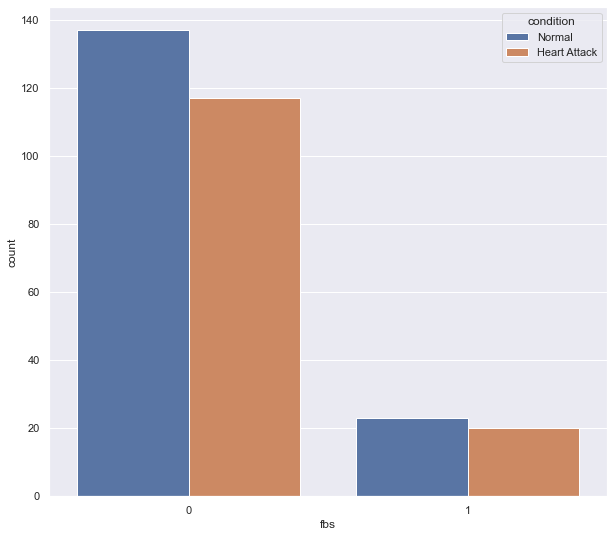

In [18]:
#8 Visualisasi variabel FBS
sns.countplot(x="fbs", data=heart_dis,hue="condition")
plt.show()

# 1 = > 120 fbs level 
# 0 = < 120 fbs level 

In [19]:
# Menghitung jumlah value variabel FBS
heart_disease.fbs.value_counts()

0    254
1     43
Name: fbs, dtype: int64

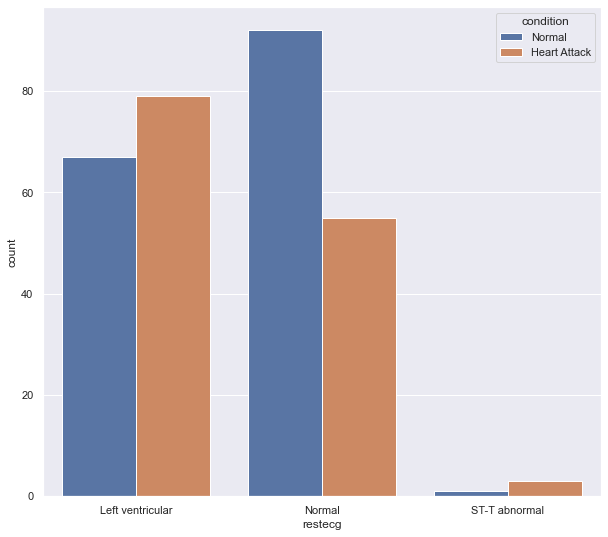

In [20]:
#9 Visualisasi variabel Restecg
sns.countplot(x="restecg", data=heart_dis,hue="condition")
plt.show()

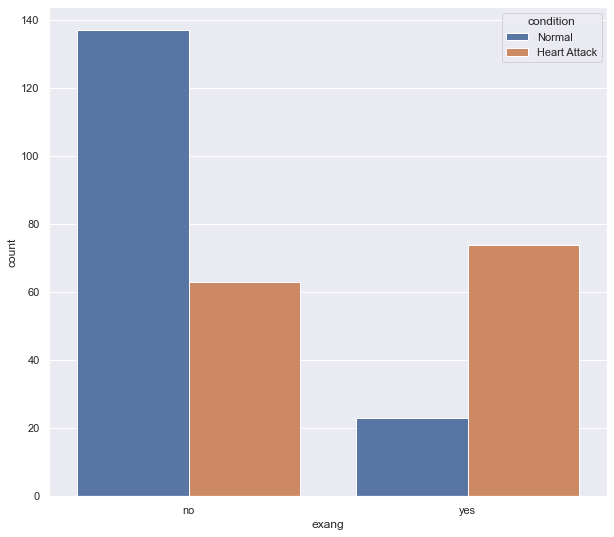

In [21]:
#10 Visualisasi variabel Exang
sns.countplot(x="exang", data=heart_dis,hue="condition")
plt.show()

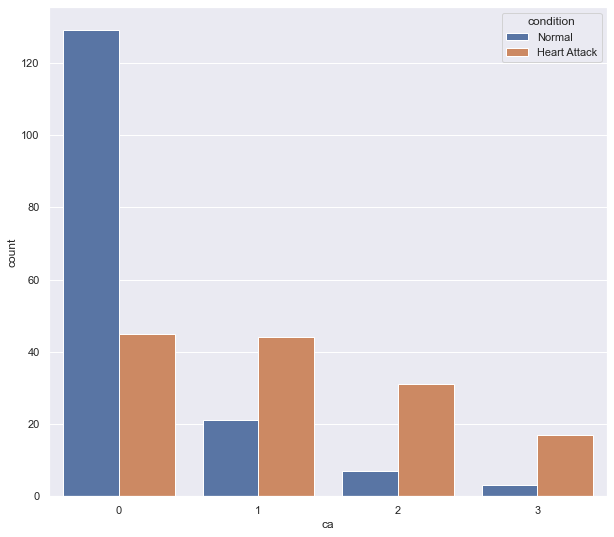

In [22]:
#11 Visualisasi variabel Ca
sns.countplot(x="ca", data=heart_dis,hue="condition")
plt.show()

/Users/valenciaeurelia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


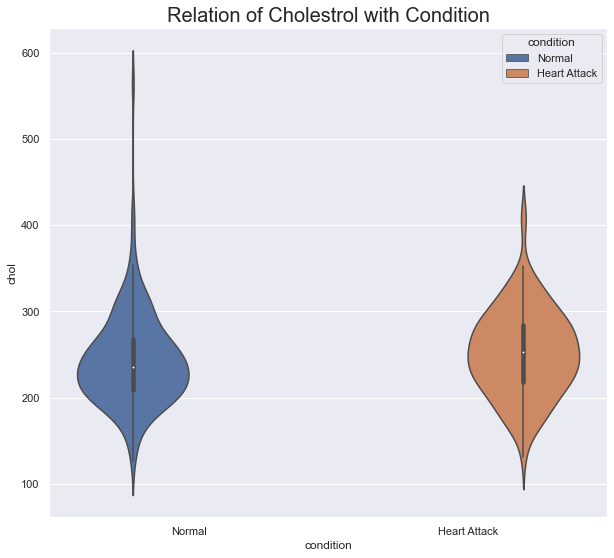

In [23]:
#12 Visualisasi relation between variabel Cholestrol with Condition
sns.violinplot(heart_dis['condition'], heart_dis['chol'],hue=heart_dis['condition'])
plt.title('Relation of Cholestrol with Condition', fontsize = 20, fontweight = 30)

plt.show()

<AxesSubplot:xlabel='condition', ylabel='chol'>

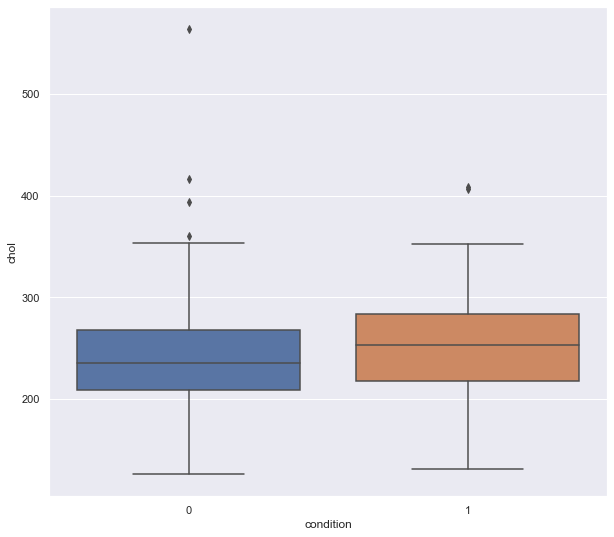

In [24]:
#13 Visualisasi boxplot variabel Condition dan Cholestrol
sns.boxplot(x="condition", y="chol", data=heart_disease)

<AxesSubplot:xlabel='condition', ylabel='thalach'>

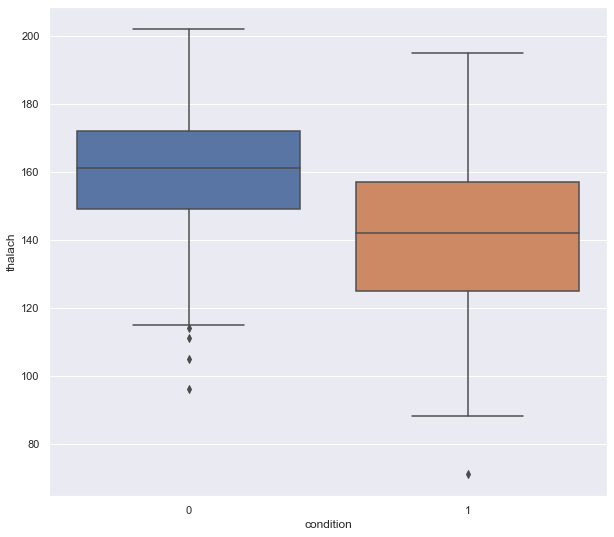

In [25]:
#17 Visualisasi boxplot ariabel Condition dan thalach
sns.boxplot(x="condition", y="thalach", data=heart_disease)

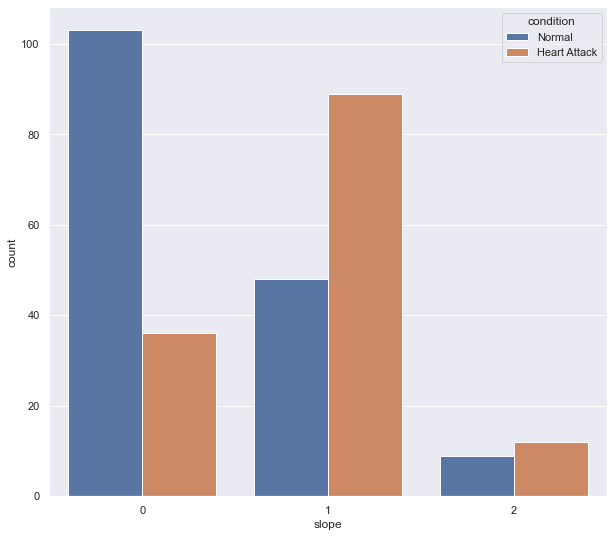

In [26]:
#20 Visualisasi variabel Slope
sns.countplot(x="slope", data=heart_dis,hue="condition")
plt.show()

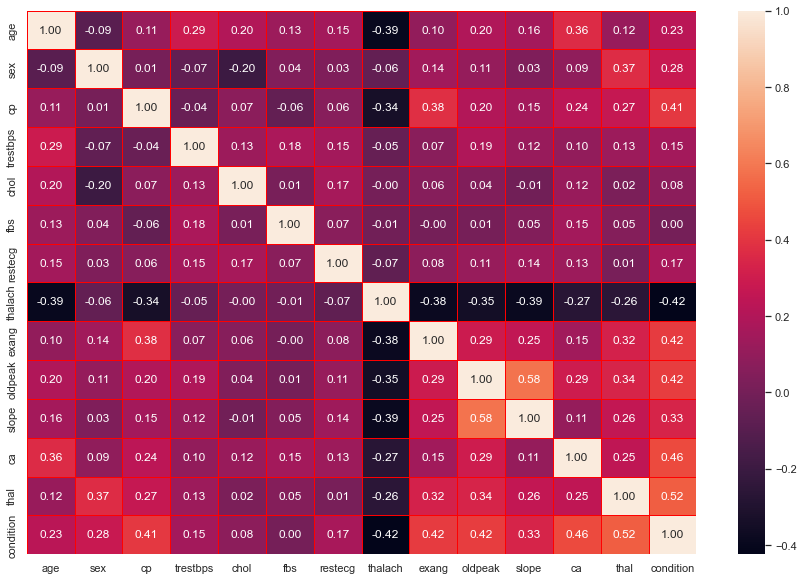

In [27]:
# Korelasi antar variabel
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heart_disease.corr(), annot=True, linewidths=0.5, linecolor="red", fmt= '.2f',ax=ax)
plt.show()

In [28]:
# Memilih variabel independen (target) dan dependen 
Y= heart_disease['condition'] #independen
X=heart_disease.drop(['condition','age','fbs','oldpeak'],axis=1) #dependen

X.shape

(297, 10)

In [29]:
# Split data
# 80% training and 20% testing.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (237, 10)
Shape of x_test : (60, 10)
Shape of y_train : (237,)
Shape of y_test : (60,)


## CRISP-DM: 4) Modelling

### Logistic Regression

In [30]:
lr = LogisticRegression(max_iter=1000).fit(x_train,y_train)

#Predict the response for test dataset
y_pred = lr.predict(x_test)

In [31]:
# Print Logistic Regression
print('Accuracy of Logistic Regression on training set: {:.3f}'.format(lr.score(x_train, y_train)))
print('Accuracy of Logistic Regression on testing set: {:.3f}'.format(lr.score(x_test, y_test)))
print('\n')

# Metrics module for accuracy calculation
print("How often the classifier model correct?")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression on training set: 0.848
Accuracy of Logistic Regression on testing set: 0.850


How often the classifier model correct?
Accuracy:  0.85


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.97      0.79      0.87        38

    accuracy                           0.85        60
   macro avg       0.85      0.87      0.85        60
weighted avg       0.88      0.85      0.85        60



#### Evaluation Logistic Regression

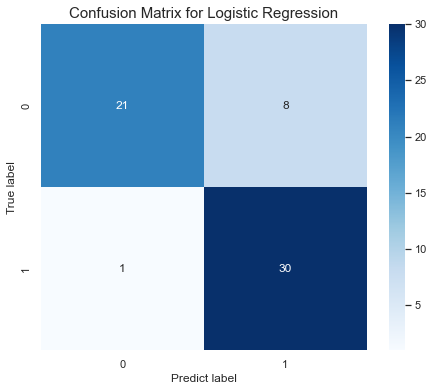

In [33]:
#Confusion Matrix
y_pred = lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm.T, square = True, annot = True, cmap = 'Blues');
plt.title('Confusion Matrix for Logistic Regression', fontsize=15);
plt.xlabel('Predict label', fontsize=12);
plt.ylabel('True label', fontsize=12);

#### Cross Validation

In [34]:
CROSS_final = cross_val_score(lr, x_train, y_train, cv=10).mean()
CROSS_final

0.8342391304347826

#### Perbandingan Algoritma Logistic Regression
- Sebelum Cross-Validation -- Akurasi = 0.85
- Sesudah Cross-Validation -- Akurasi = 0.8342391304347826

### Decision Tree

In [35]:
dt = DecisionTreeClassifier().fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(x_test)

In [36]:
# Print Decision Tree
print('Accuracy of Decision Tree on training set: {:.3f}'.format(dt.score(x_train, y_train)))
print('Accuracy of Decision Tree on testing set: {:.3f}'.format(dt.score(x_test, y_test)))
print('\n')

# Metrics module for accuracy calculation
print("How often the classifier model correct?")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree on training set: 1.000
Accuracy of Decision Tree on testing set: 0.733


How often the classifier model correct?
Accuracy:  0.7333333333333333


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68        22
           1       0.84      0.71      0.77        38

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.76      0.73      0.74        60



#### Evaluation Decision Tree

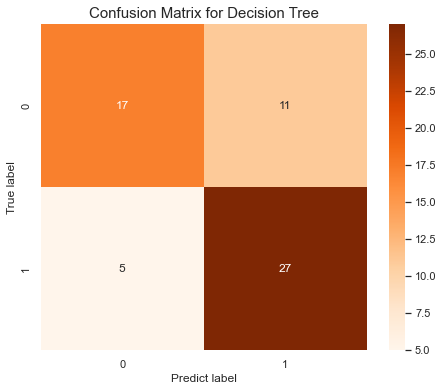

In [38]:
#Confusion Matrix
y_pred = dt.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm.T, square = True, annot = True, cmap = 'Oranges');
plt.title('Confusion Matrix for Decision Tree', fontsize=15);
plt.xlabel('Predict label', fontsize=12);
plt.ylabel('True label', fontsize=12);

#### Cross Validation

In [39]:
CROSS_final = cross_val_score(dt, x_train, y_train, cv=10).mean()
CROSS_final

0.7204710144927535

#### Perbandingan Algoritma Decision Tree
- Sebelum Cross-Validation -- Akurasi = 0.7333333333333333
- Sesudah Cross-Validation -- Akurasi = 0.7204710144927535

### Compare 2 models

In [40]:
# Logistic Regression
test_score = accuracy_score(y_test, lr.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr.predict(x_train)) * 100

results_heart = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

#Decision Tree
test_score = accuracy_score(y_test, dt.predict(x_test)) * 100
train_score = accuracy_score(y_train, dt.predict(x_train)) * 100

results_heart_1 = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_heart = results_heart.append(results_heart_1, ignore_index=True)

#show
results_heart

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.810127,85.000000
1,Decision Tree,100.000000,73.333333


> Logistic Regression memiliki performa yang lebih baik untuk dataset heart dilihat dari nilai akurasi testing yang lebih tinggi. Kemudian untuk nilai true positive pada Algoritma Logistic Regression juga lebih banyak yaitu sebesar 27 dibandingkan dengan  DT